In [2]:
# Step 1: Import Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to display images using Matplotlib
def display_image(img, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Helper function for displaying grayscale channels
def display_grayscale_image(channel, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(channel, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

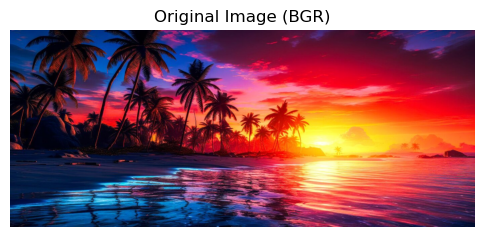

In [4]:
# Load the image (replace 'playa_colores.jpg' with your own image file)
image = cv2.imread('playa_colores.jpg')

# Display the original image
display_image(image, "Original Image (BGR)")

## Convert to YUV Color Space

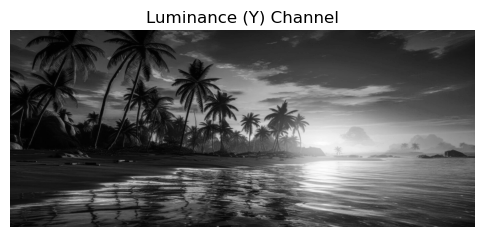

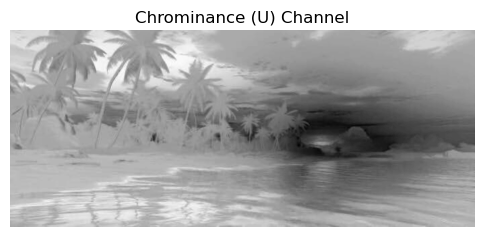

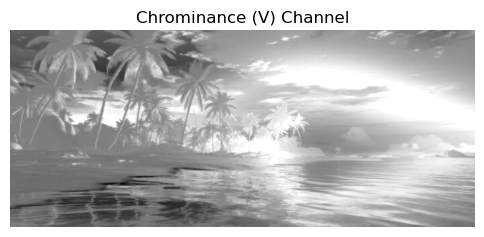

In [7]:
# Convert the image from BGR to YUV color space
yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Split the YUV image into Y, U, and V channels
Y, U, V = cv2.split(yuv_image)

# Display the Y, U, and V channels
display_grayscale_image(Y, "Luminance (Y) Channel")
display_grayscale_image(U, "Chrominance (U) Channel")
display_grayscale_image(V, "Chrominance (V) Channel")

## Chroma Subsampling (4:2:0)

In [18]:
U.shape, U_subsampled.shape

((584, 1380), (292, 690))

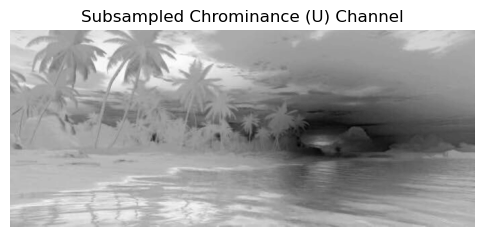

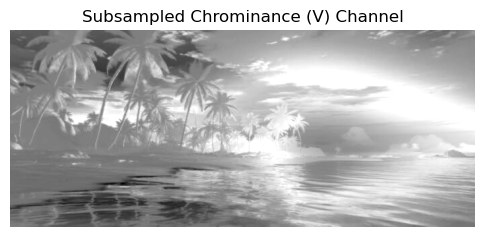

In [12]:
# Apply chroma subsampling (4:2:0)
U_subsampled = cv2.resize(U, (U.shape[1] // 2, U.shape[0] // 2), interpolation=cv2.INTER_LINEAR)
V_subsampled = cv2.resize(V, (V.shape[1] // 2, V.shape[0] // 2), interpolation=cv2.INTER_LINEAR)

# Display the subsampled U and V channels
display_grayscale_image(U_subsampled, "Subsampled Chrominance (U) Channel")
display_grayscale_image(V_subsampled, "Subsampled Chrominance (V) Channel")

## Chroma Quantization

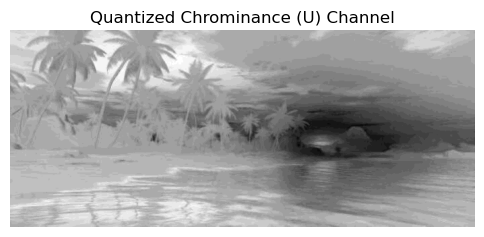

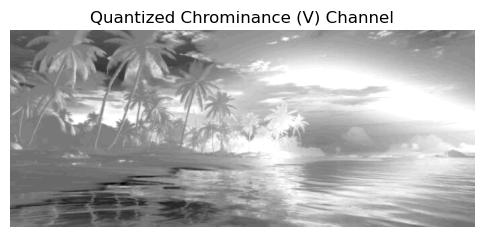

In [21]:
# Function to quantize a channel to the specified number of levels
def quantize_channel(channel, levels):
    max_value = 255
    factor = max_value // levels
    return (channel // factor) * factor

# Quantize U and V channels (reduce color precision)
U_quantized = quantize_channel(U_subsampled, 32)
V_quantized = quantize_channel(V_subsampled, 32)

# Display the quantized U and V channels
display_grayscale_image(U_quantized, "Quantized Chrominance (U) Channel")
display_grayscale_image(V_quantized, "Quantized Chrominance (V) Channel")

## Reconstruct the Image

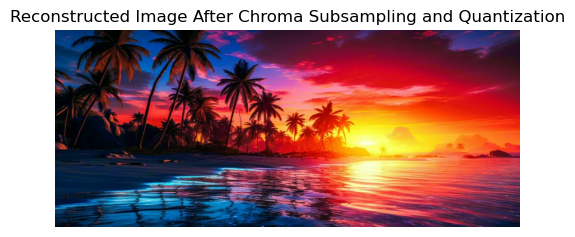

In [24]:
# Upsample U and V back to the original resolution
U_upsampled = cv2.resize(U_quantized, (Y.shape[1], Y.shape[0]), interpolation=cv2.INTER_LINEAR)
V_upsampled = cv2.resize(V_quantized, (Y.shape[1], Y.shape[0]), interpolation=cv2.INTER_LINEAR)

# Merge the Y, U, and V channels back into a YUV image
yuv_reconstructed = cv2.merge([Y, U_upsampled, V_upsampled])

# Convert the reconstructed YUV image back to BGR for display
reconstructed_image = cv2.cvtColor(yuv_reconstructed, cv2.COLOR_YUV2BGR)

# Display the reconstructed image
display_image(reconstructed_image, "Reconstructed Image After Chroma Subsampling and Quantization")

## Compare Original and Compressed Images

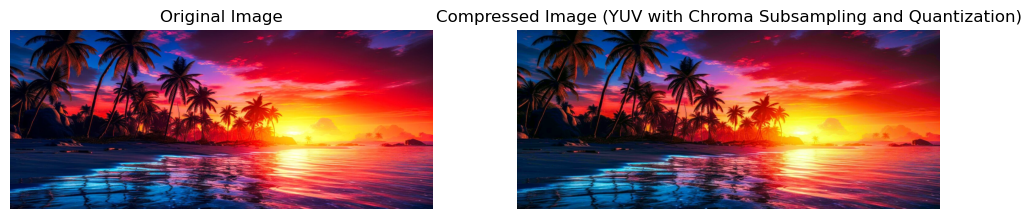

In [27]:
# Display the original and reconstructed images side by side for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
plt.title("Compressed Image (YUV with Chroma Subsampling and Quantization)")
plt.axis('off')

plt.show()

# Color Spaces (RGB, YUV, HSV, CMYK, Lab)

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to display images using Matplotlib
def display_image(img, title, is_gray=False):
    plt.figure(figsize=(6, 6))
    if is_gray:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

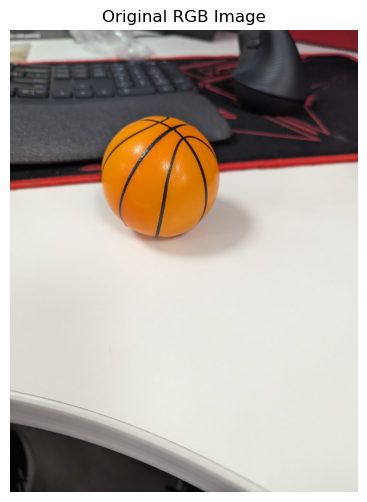

In [33]:
# Load an image
image = cv2.imread('orange_ball_00.jpg')  # Replace with the path to your image

# Convert the image to RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display_image(rgb_image, "Original RGB Image")

## Convert to YUV Color Space

In [35]:
Y, U, V = yuv_image[:,:,0], yuv_image[:,:,1], yuv_image[:,:,2]

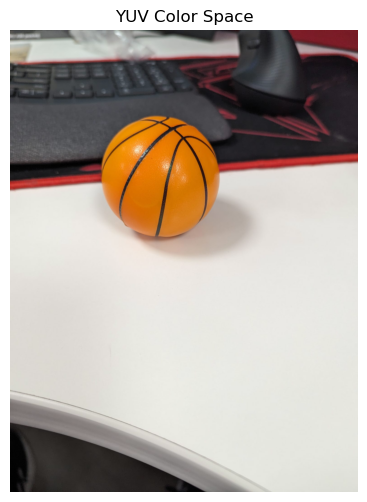

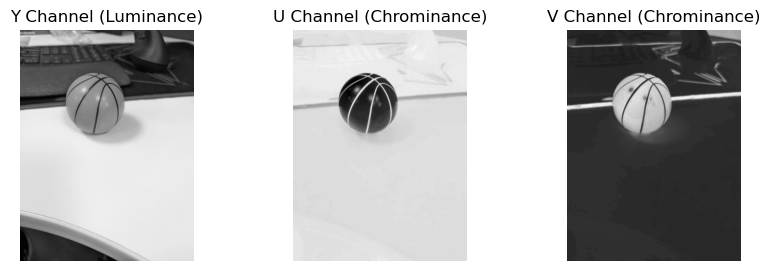

In [37]:
# Convert the image to YUV color space
yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
Y, U, V = cv2.split(yuv_image)
display_image(cv2.cvtColor(yuv_image, cv2.COLOR_YUV2RGB), "YUV Color Space")

# Display the Y, U, and V channels
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(Y, cmap='gray')
plt.title("Y Channel (Luminance)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(U, cmap='gray')
plt.title("U Channel (Chrominance)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(V, cmap='gray')
plt.title("V Channel (Chrominance)")
plt.axis('off')
plt.show()

## create a function to convert from RGB to YUV

In [63]:
H.min(), H.max(), S.min

(0, 179, <function ndarray.min>)

## Convert to HSV Color Space

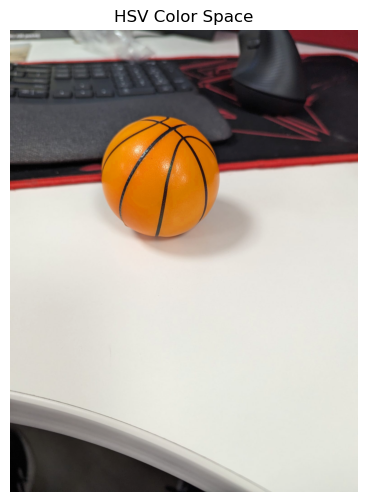

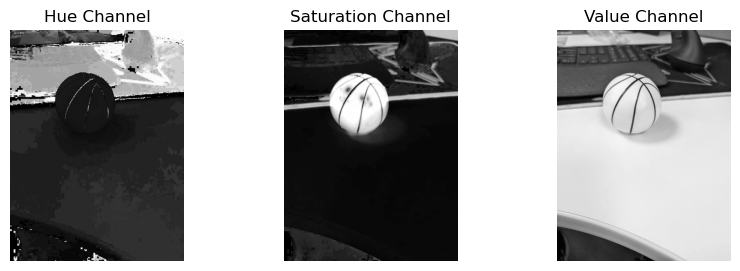

In [43]:
# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
H, S, V_hsv = cv2.split(hsv_image)
display_image(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB), "HSV Color Space")

# Display the individual H, S, and V channels
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(H, cmap='gray')
plt.title("Hue Channel")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(S, cmap='gray')
plt.title("Saturation Channel")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(V_hsv, cmap='gray')
plt.title("Value Channel")
plt.axis('off')
plt.show()

## Convert to CMYK Color Space

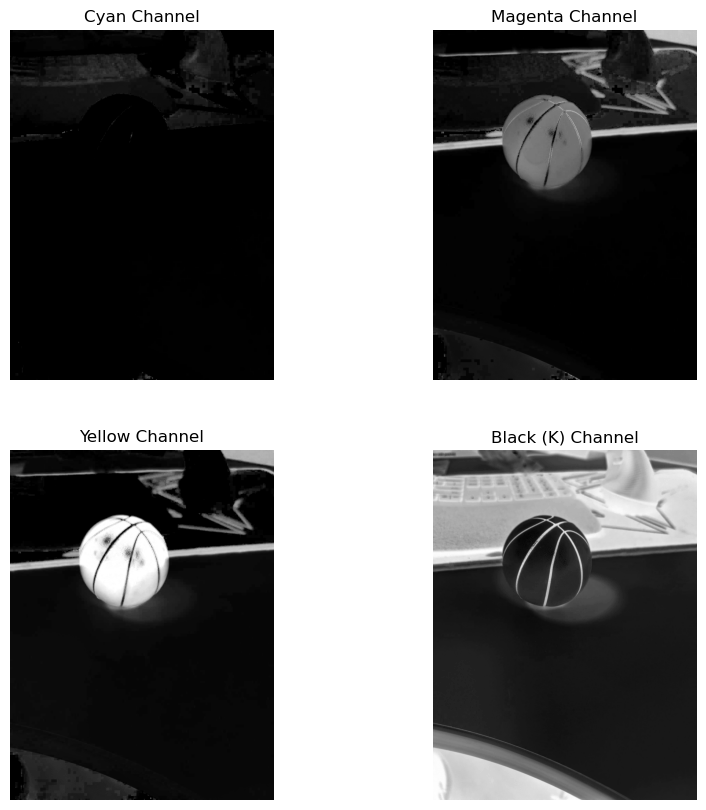

In [46]:
# Convert RGB to CMYK
def rgb_to_cmyk(image):
    rgb = image.astype(float) / 255.0
    K = 1 - np.max(rgb, axis=2)
    C = (1 - rgb[:, :, 0] - K) / (1 - K + 1e-10)
    M = (1 - rgb[:, :, 1] - K) / (1 - K + 1e-10)
    Y = (1 - rgb[:, :, 2] - K) / (1 - K + 1e-10)
    CMYK = (np.stack([C, M, Y, K], axis=2) * 255).astype(np.uint8)
    return CMYK

cmyk_image = rgb_to_cmyk(rgb_image)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(cmyk_image[:, :, 0], cmap='gray')
plt.title("Cyan Channel")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cmyk_image[:, :, 1], cmap='gray')
plt.title("Magenta Channel")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cmyk_image[:, :, 2], cmap='gray')
plt.title("Yellow Channel")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cmyk_image[:, :, 3], cmap='gray')
plt.title("Black (K) Channel")
plt.axis('off')
plt.show()

# Histogram Equalization on HSV and Lab Color Spaces

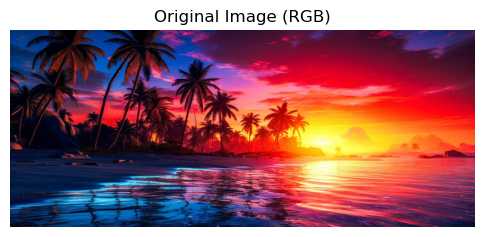

In [49]:
# Step 2: Load Image and Display the Original
image = cv2.imread('playa_colores.jpg')  # Replace 'orange_ball_00.jpg' with the path to your image

# Convert the image to RGB for proper visualization in matplotlib
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display_image(rgb_image, "Original Image (RGB)")

## Histogram Equalization on the HSV Color Space

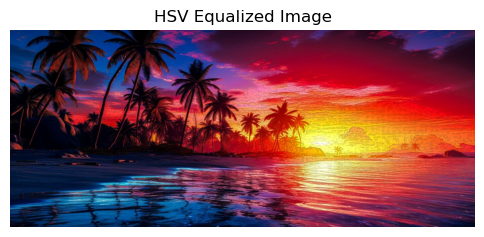

In [52]:
# Step 3: Histogram Equalization on the HSV Color Space

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into its components (Hue, Saturation, Value)
H, S, V = cv2.split(hsv_image)

# Apply histogram equalization only on the Value channel
equalized_V = cv2.equalizeHist(V)

# Merge the equalized Value channel back with Hue and Saturation
hsv_equalized = cv2.merge([H, S, equalized_V])

# Convert back to RGB for display
hsv_equalized_rgb = cv2.cvtColor(hsv_equalized, cv2.COLOR_HSV2RGB)
display_image(hsv_equalized_rgb, "HSV Equalized Image")

## Histogram Equalization on the Lab Color Space

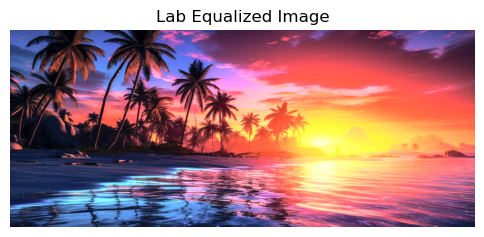

In [55]:
# Step 4: Histogram Equalization on the Lab Color Space

# Convert the image to Lab color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the Lab image into its components (L: Lightness, a: Green-Red, b: Blue-Yellow)
L, a, b = cv2.split(lab_image)

# Apply histogram equalization on the L (Lightness) channel
equalized_L = cv2.equalizeHist(L)

# Merge the equalized L channel back with a and b
lab_equalized = cv2.merge([equalized_L, a, b])

# Convert back to RGB for display
lab_equalized_rgb = cv2.cvtColor(lab_equalized, cv2.COLOR_LAB2RGB)
display_image(lab_equalized_rgb, "Lab Equalized Image")

In [ ]:
## Display Results

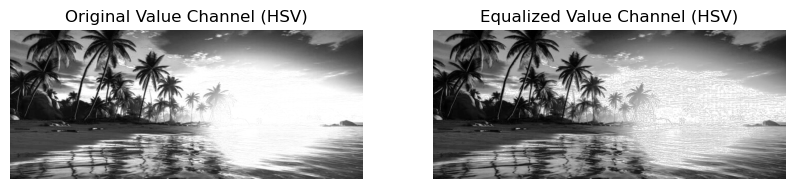

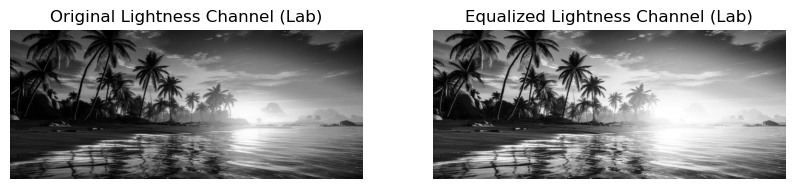

In [57]:
# Step 5: Display Results

# Display the original Value and equalized Value channels
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(V, cmap='gray')
plt.title("Original Value Channel (HSV)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_V, cmap='gray')
plt.title("Equalized Value Channel (HSV)")
plt.axis('off')

plt.show()

# Display the original Lightness and equalized Lightness channels
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(L, cmap='gray')
plt.title("Original Lightness Channel (Lab)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_L, cmap='gray')
plt.title("Equalized Lightness Channel (Lab)")
plt.axis('off')

plt.show()

In [ ]:
## Comparison of the original image with the equalized versions

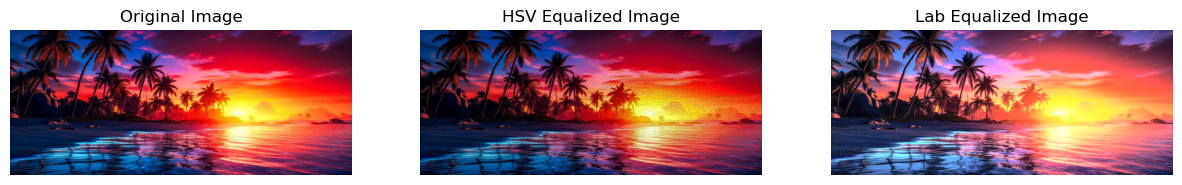

In [59]:
# Step 6: Comparison of the original image with the equalized versions
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(rgb_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(hsv_equalized_rgb)
plt.title("HSV Equalized Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(lab_equalized_rgb)
plt.title("Lab Equalized Image")
plt.axis('off')

plt.show()

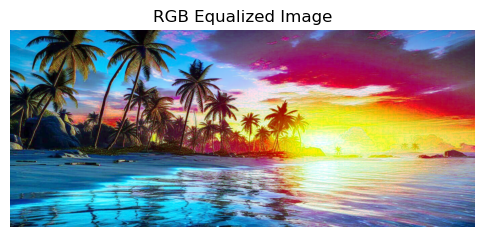

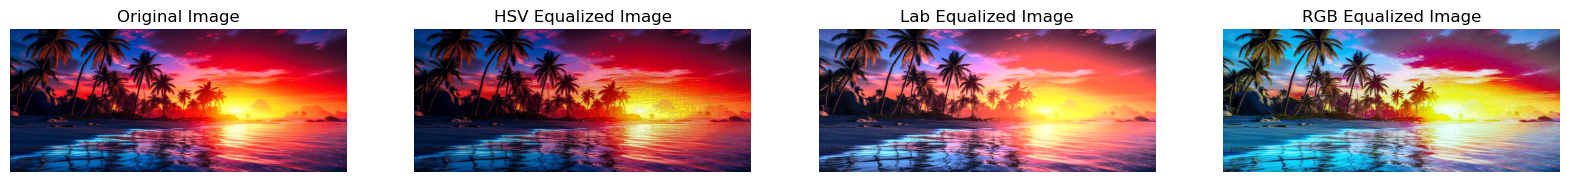

In [61]:
# ### Step 7: Compare Histogram Equalization by Color Channel
# In this step, we will apply histogram equalization to each color channel (R, G, B) separately
# and compare the results with the HSV and Lab methods.


def equalize_color_channels(image):
    """Applies histogram equalization to each color channel separately."""
    b, g, r = cv2.split(image)
    eq_b = cv2.equalizeHist(b)
    eq_g = cv2.equalizeHist(g)
    eq_r = cv2.equalizeHist(r)
    equalized_image = cv2.merge((eq_b, eq_g, eq_r))
    return equalized_image

rgb_equalized_image = equalize_color_channels(rgb_image)
display_image(rgb_equalized_image, "RGB Equalized Image")

# Compare the original image with the equalized versions
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.imshow(rgb_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(hsv_equalized_rgb)
plt.title("HSV Equalized Image")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(lab_equalized_rgb)
plt.title("Lab Equalized Image")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(rgb_equalized_image)
plt.title("RGB Equalized Image")
plt.axis('off')

plt.show()


# Segmentation_Using_Color_Spaces

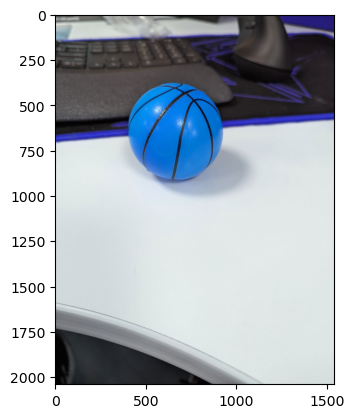

In [68]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

ball = cv.imread('orange_ball_00.jpg')
plt.imshow(ball)
plt.show()

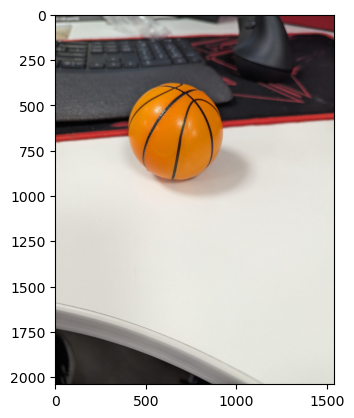

In [70]:
# OpenCV by default reads images in BGR format.
ball = cv.cvtColor(ball, cv.COLOR_BGR2RGB)
plt.imshow(ball)
plt.show()

## Visualizing the ball in RGB Color Space

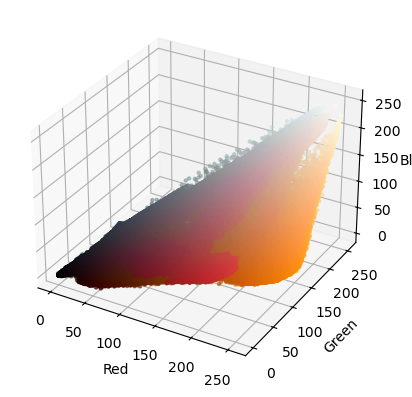

In [74]:
# Some Matplotlib libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# OpenCV split() is very handy here; it splits an image into its component channels.
# These few lines of code split the image and set up the 3D plot:
r, g, b = cv.split(ball)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

# Normalizing just means condensing the range of colors from 0-255 to 0-1
pixel_colors = ball.reshape((np.shape(ball)[0]*np.shape(ball)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()


axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [ ]:
## Visualizing ball in HSV Color Space

In [76]:
# To convert an image from RGB to HSV, you can use cvtColor():
hsv_ball = cv.cvtColor(ball, cv.COLOR_RGB2HSV)

In [ ]:
## Generating the colored 3D Scatter Plot for the Image in HSV

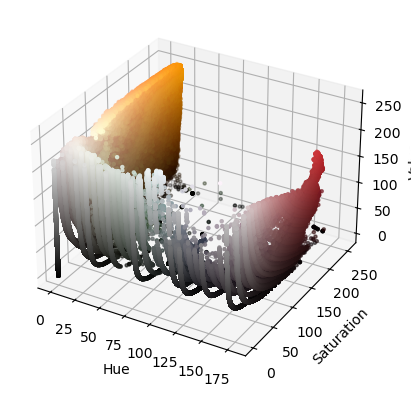

In [78]:
h, s, v = cv.split(hsv_ball)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [ ]:
## Picking Out a Range

In [80]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

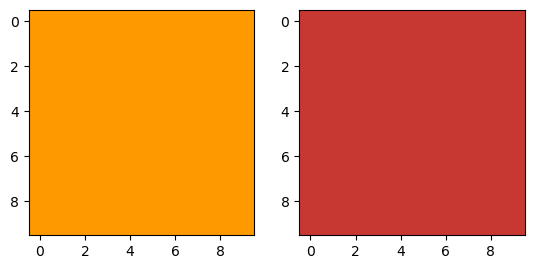

In [82]:
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8)
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8)
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(do_square, cv.COLOR_HSV2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(lo_square, cv.COLOR_HSV2RGB))
plt.show()

In [84]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv.cvtColor(green,cv.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


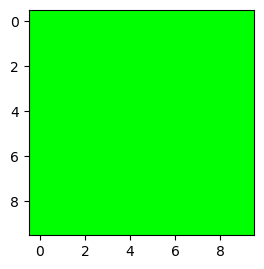

In [86]:
lo_square = np.full((10, 10, 3), hsv_green, dtype=np.uint8)
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(lo_square, cv.COLOR_HSV2RGB))
plt.show()

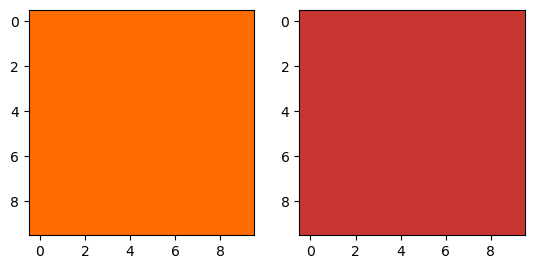

In [88]:
from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

# That produces these images, filled with the chosen colors:

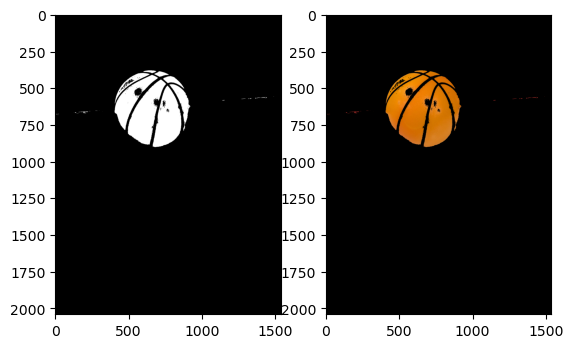

In [90]:
mask = cv.inRange(hsv_ball, light_orange, dark_orange)

result = cv.bitwise_and(ball, ball, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

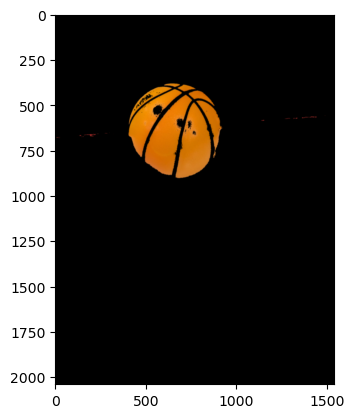

In [92]:
blur = cv.GaussianBlur(result, (7, 7), 0)
plt.imshow(blur)
plt.show()